## Hello World - Convolutional Neural Networks

Let's study the MINST Dataset, in this notebook we will:

1. Load the dataset
2. Explore it 
3. Understand how a computer "see" images
4. Normalize data
5. Use the image representation to learn classifiers

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pprint
import keras

**1. Load the dataset**

In [2]:
from keras.datasets import mnist

In [3]:
digits = mnist.load_data()
(train_img, train_labels), (test_img, test_labels) = mnist.load_data()

**2. Let's check out the dataset dimensions**

In [4]:
print(f' Training data dimension: {train_img.shape}  \n IMAGE, X, Y ')

 Training data dimension: (60000, 28, 28)  
 IMAGE, X, Y 


**Now let's explore how one image looks like**

In [5]:
p_print = pprint.PrettyPrinter(indent=1, width=80,  compact=False)
images = [image for image in train_img[0:2]]

In [6]:
pprint.pprint(images[1])

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

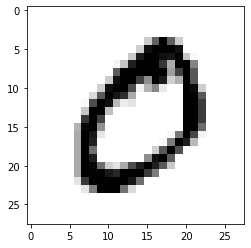

In [7]:
plt.imshow(images[1], cmap = 'binary')

**3. Understand how computer sees images: Images are multi-dimensional arrays - (image, x, y)**

**4. Preprocess the data: We want to transform the 0-255 values to be between 0-1, and set it up in ways that will help our neural network learn important features**

In [8]:
train_img = train_img.reshape((60000, 28, 28, 1))
train_img = train_img.astype('float32')/255

test_img = test_img.reshape((10000, 28, 28, 1))
test_img = test_img.astype('float32')/255

**5. Take the labels and convert them to categorical data**

In [9]:
labels = [label for label in test_labels[0:9]]
print(labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5]


In [10]:
from keras.utils import to_categorical 

In [11]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Let's see how the labels look now after using *to_categorical* function

In [12]:
labels_cat = [label_c for label_c in train_labels[0:2]]
print(labels_cat)

[array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)]


**6. Define classifier: Neural Network**

In [13]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras import models

cnn = models.Sequential()
cnn.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(64,(3,3), activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(64, (3,3), activation='relu'))

cnn.add(Flatten())
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(10, activation='softmax'))

cnn.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

7. **Train the network** 

Before running the training step, let's recap what we have done so far:

1. Loaded the training / test data using keras.dataset
2. Explored the data dimensions and size 
3. Observed how a computer encodes the image as a matrix of numbers, where in this case was from 0-255
4. We normalized the data, so instead of having values from 0-255, now we have from 0-1 and converted it to float
5. Converted the labels to a one-hot encoding representation, where each '1' in given position represents the number
6. Defined the architecture of our NN using a fully connected two-dense layers

In [14]:
cnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
cnn.fit(train_img, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 13s 28ms/step - loss: 0.5136 - accuracy: 0.8394
Epoch 2/5
469/469 [==============================] - 16s 35ms/step - loss: 0.0637 - accuracy: 0.9798
Epoch 3/5
469/469 [==============================] - 16s 35ms/step - loss: 0.0392 - accuracy: 0.9876
Epoch 4/5
469/469 [==============================] - 18s 38ms/step - loss: 0.0289 - accuracy: 0.9910
Epoch 5/5
469/469 [==============================] - 18s 38ms/step - loss: 0.0199 - accuracy: 0.9942


**8. Use the test data** 

In [15]:
test_loss, test_accuracy = cnn.evaluate(test_img, test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.0368 - accuracy: 0.9898


In [24]:
cnn.save('model')

INFO:tensorflow:Assets written to: model/assets
